<a href="https://colab.research.google.com/github/LikaAlfi/BigData-Prak1/blob/main/bigdatatugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Tugas 1
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame dengan tambahan kolom pekerjaan, hobi, dan gender
data = [
    ("Jeve", 35, "Pengacara", "Membaca", "Perempuan"),
    ("Jaga", 25, "Mekanik", "Gaming", "Laki-laki"),
    ("El", 28, "Dosen", "Traveling", "Perempuan"),
    ("Dario", 31, "Arsitek", "Gaming", "Laki-laki"),
    ("Lika", 19, "Mahasiswa", "Membaca", "Perempuan")
]

columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]

# Membuat DataFrame
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()


+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
| Jeve|  35|Pengacara|  Membaca|Perempuan|
| Jaga|  25|  Mekanik|   Gaming|Laki-laki|
|   El|  28|    Dosen|Traveling|Perempuan|
|Dario|  31|  Arsitek|   Gaming|Laki-laki|
| Lika|  19|Mahasiswa|  Membaca|Perempuan|
+-----+----+---------+---------+---------+



In [71]:
# Tugas 2
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Memulai Spark session
spark = SparkSession.builder.appName("PySparkManipulasi").getOrCreate()

# Membuat DataFrame dengan beberapa kolom
data = [
    ("Jeve", 35, "Pengacara", "Membaca", "Perempuan"),
    ("Jaga", 25, "Mekanik", "Gaming", "Laki-laki"),
    ("El", 28, "Dosen", "Traveling", "Perempuan"),
    ("Dario", 31, "Arsitek", "Gaming", "Laki-laki"),
    ("Lika", 19, "Mahasiswa", "Membaca", "Perempuan")
]

columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame asli
print("~~~ DataFrame Asli ~~~")
df.show()

# Filtering data (usia > 25)
print("~~~ Filter: Usia > 25 ~~~")
df_filtered = df.filter(df["Usia"] > 25)
df_filtered.show()

# Menghitung rata-rata usia
print("~~ Rata-rata Usia ~~")
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia (descending)
print("~ Urutkan berdasarkan Usia (desc) ~")
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()


~~~ DataFrame Asli ~~~
+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
| Jeve|  35|Pengacara|  Membaca|Perempuan|
| Jaga|  25|  Mekanik|   Gaming|Laki-laki|
|   El|  28|    Dosen|Traveling|Perempuan|
|Dario|  31|  Arsitek|   Gaming|Laki-laki|
| Lika|  19|Mahasiswa|  Membaca|Perempuan|
+-----+----+---------+---------+---------+

~~~ Filter: Usia > 25 ~~~
+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
| Jeve|  35|Pengacara|  Membaca|Perempuan|
|   El|  28|    Dosen|Traveling|Perempuan|
|Dario|  31|  Arsitek|   Gaming|Laki-laki|
+-----+----+---------+---------+---------+

~~ Rata-rata Usia ~~
+---------+
|avg(Usia)|
+---------+
|     27.6|
+---------+

~ Urutkan berdasarkan Usia (desc) ~
+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
| Jeve|  35|Pe

In [73]:
# Tugas 3
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {
    "Nama": ["Jaga", "Jeve", "Dario", "El", "Lika"],
    "Usia": [25, 35, 31, 28, 19],
}

df_pandas = pd.DataFrame(data_pandas)

print("--- DataFrame Asli ---")
print(df_pandas)

# Menambahkan kolom baru: TB dan BB
df_pandas["Tinggi Badan"] = [180, 175, 178, 176, 160]
df_pandas["Berat Badan"] = [70, 65, 72, 67, 45]

print("\n-- DataFrame Setelah Ditambah Kolom Baru --")
print(df_pandas)

# Filtering: Tinggi Badan > 170
df_filtered = df_pandas[df_pandas["Tinggi Badan"] < 170]

print("\n=== Filter: Tinggi Badan > 170")
print(df_filtered)

# mengUrutkan berdasarkan Berat Badan descending
df_sorted = df_pandas.sort_values(by="Berat Badan", ascending=False)

print("\n~- Urutkan Berdasarkan Berat Badan (desc) -~")
print(df_sorted)


--- DataFrame Asli ---
    Nama  Usia
0   Jaga    25
1   Jeve    35
2  Dario    31
3     El    28
4   Lika    19

-- DataFrame Setelah Ditambah Kolom Baru --
    Nama  Usia  Tinggi Badan  Berat Badan
0   Jaga    25           180           70
1   Jeve    35           175           65
2  Dario    31           178           72
3     El    28           176           67
4   Lika    19           160           45

=== Filter: Tinggi Badan > 170
   Nama  Usia  Tinggi Badan  Berat Badan
4  Lika    19           160           45

~- Urutkan Berdasarkan Berat Badan (desc) -~
    Nama  Usia  Tinggi Badan  Berat Badan
2  Dario    31           178           72
0   Jaga    25           180           70
3     El    28           176           67
1   Jeve    35           175           65
4   Lika    19           160           45


=== DataFrame Hasil Join ===
    Nama  Usia  Tinggi Badan  Berat Badan
0   Jaga    25           180           70
1   Jeve    35           175           65
2  Dario    31           178           72
3     El    28           176           67
4   Lika    19           160           45

=== Statistik Deskriptif ===
          Usia  Tinggi Badan  Berat Badan
count   5.0000      5.000000     5.000000
mean   27.6000    173.800000    63.800000
std     6.0663      7.949843    10.848963
min    19.0000    160.000000    45.000000
25%    25.0000    175.000000    65.000000
50%    28.0000    176.000000    67.000000
75%    31.0000    178.000000    70.000000
max    35.0000    180.000000    72.000000


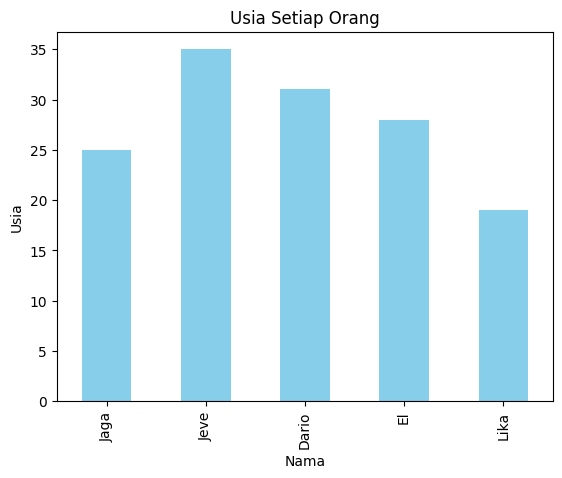

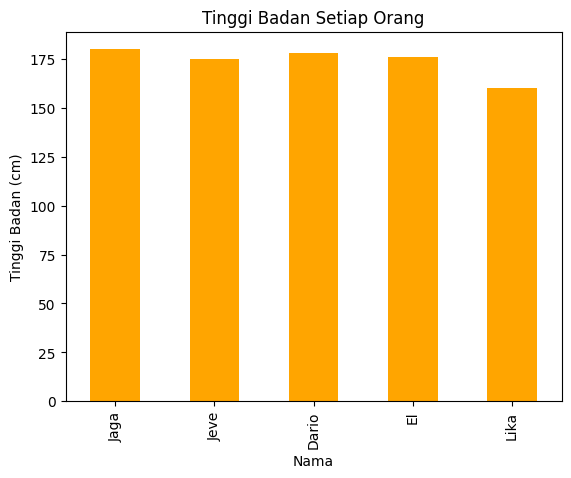

In [61]:
# Tugas 4
import pandas as pd
import matplotlib.pyplot as plt

# Membuat DataFrame pertama
data_pandas = {
    "Nama": ["Jaga", "Jeve", "Dario", "El", "Lika"],
    "Usia": [25, 35, 31, 28, 19],
}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {
    "Nama": ["Jaga", "Jeve", "Dario", "El", "Lika"],
    "Tinggi Badan": [180, 175, 178, 176, 160],
    "Berat Badan": [70, 65, 72, 67, 45]
}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# 1. Join (gabungkan) kedua DataFrame berdasarkan kolom "Nama"
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print("=== DataFrame Hasil Join ===")
print(df_joined)

# 2. Menghitung statistik deskriptif
print("\n=== Statistik Deskriptif ===")
print(df_joined.describe())

# 3. Visualisasi data (Plot usia dalam bentuk bar chart)
df_joined.plot(x="Nama", y="Usia", kind="bar", color="skyblue", legend=False)
plt.title("Usia Setiap Orang")
plt.xlabel("Nama")
plt.ylabel("Usia")
plt.show()

# 4. Visualisasi data (Plot tinggi badan dalam bentuk bar chart)
df_joined.plot(x="Nama", y="Tinggi Badan", kind="bar", color="orange", legend=False)
plt.title("Tinggi Badan Setiap Orang")
plt.xlabel("Nama")
plt.ylabel("Tinggi Badan (cm)")
plt.show()


In [62]:
# Tugas 5
# Import library yang dibutuhkan
import pandas as pd
from pyspark.sql import SparkSession

# Membuat Spark session (wajib saat pakai PySpark)
spark = SparkSession.builder.appName("Pandas_PySpark_Integration").getOrCreate()

# Membuat DataFrame Pandas
data_pandas = {
    "Nama": ["Jaga", "Jeve", "Dario", "El", "Lika"],
    "Usia": [25, 35, 31, 28, 19],
    "Tinggi Badan": [180, 175, 178, 176, 160],
    "Berat Badan": [70, 65, 72, 67, 45]
}
df_pandas = pd.DataFrame(data_pandas)

# Konversi DataFrame Pandas ke DataFrame PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Buat DataFrame PySpark kedua langsung di PySpark
data_spark = [
    ("Jeve", "Pengacara", "Membaca", "Perempuan"),
    ("Jaga", "Mekanik", "Gaming", "Laki-laki"),
    ("El", "Dosen", "Traveling", "Perempuan"),
    ("Dario", "Arsitek", "Gaming", "Laki-laki"),
    ("Lika", "Mahasiswa", "Membaca", "Perempuan")
]
columns = ["Nama", "Pekerjaan", "Hobi", "Gender"]
df_spark = spark.createDataFrame(data_spark, columns)

# Gabungkan DataFrame PySpark dari Pandas dengan DataFrame PySpark lain
df_joined = df_spark_from_pandas.join(df_spark, on="Nama", how="inner")

# Tampilkan hasil penggabungan
print("=== Hasil Penggabungan ===")
df_joined.show()

# Analisis sederhana: menghitung rata-rata usia
print("\n=== Rata-rata Usia ===")
df_joined.selectExpr("avg(Usia) as Rata_rata_Usia").show()


=== Hasil Penggabungan ===
+-----+----+------------+-----------+---------+---------+---------+
| Nama|Usia|Tinggi Badan|Berat Badan|Pekerjaan|     Hobi|   Gender|
+-----+----+------------+-----------+---------+---------+---------+
|Dario|  31|         178|         72|  Arsitek|   Gaming|Laki-laki|
|   El|  28|         176|         67|    Dosen|Traveling|Perempuan|
| Jaga|  25|         180|         70|  Mekanik|   Gaming|Laki-laki|
| Jeve|  35|         175|         65|Pengacara|  Membaca|Perempuan|
| Lika|  19|         160|         45|Mahasiswa|  Membaca|Perempuan|
+-----+----+------------+-----------+---------+---------+---------+


=== Rata-rata Usia ===
+--------------+
|Rata_rata_Usia|
+--------------+
|          27.6|
+--------------+



In [68]:
# Tugas 6
# Import library
import pandas as pd
from pyspark.sql import SparkSession

# Membuat Spark session
spark = SparkSession.builder.appName("Konversi_PySpark_Pandas").getOrCreate()

# 1. Membuat DataFrame Pandas
data_pandas = {
    "Nama": ["Jaga", "Jeve", "Dario", "El", "Lika"],
    "Usia": [25, 35, 31, 28, 19]
}
df_pandas = pd.DataFrame(data_pandas)

# 2. Konversi dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# 3. Membuat DataFrame PySpark lain secara langsung (HARUS ada kolom Nama)
data_spark = [
    ("Jaga", "Mekanik", "Gaming", "Laki-laki"),
    ("Jeve", "Pengacara", "Membaca", "Perempuan"),
    ("El", "Dosen", "Traveling", "Perempuan"),
    ("Dario", "Arsitek", "Gaming", "Laki-laki"),
    ("Lika", "Mahasiswa", "Membaca", "Perempuan")
]
columns = ["Nama", "Pekerjaan", "Hobi", "Gender"]
df_spark = spark.createDataFrame(data_spark, columns)

# 4. Konversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Menampilkan DataFrame hasil konversi
print("=== DataFrame dari PySpark ke Pandas ===")
print(df_pandas_from_spark)

print("\n=== DataFrame dari Pandas ke PySpark ===")
df_spark_from_pandas.show()

# 5. Gabungkan DataFrame hasil konversi (join berdasarkan Nama)
df_joined = df_spark_from_pandas.join(df_spark, on="Nama", how="inner")
print("\n=== Hasil Gabungan DataFrame (Pandas + PySpark) ===")
df_joined.show()

# 6. Hitung nilai maksimum usia
max_usia = df_joined.agg({"Usia": "max"}).collect()[0][0]
print("\n=== Nilai Maksimum Usia ===")
print(max_usia)


=== DataFrame dari PySpark ke Pandas ===
    Nama  Pekerjaan       Hobi     Gender
0   Jaga    Mekanik     Gaming  Laki-laki
1   Jeve  Pengacara    Membaca  Perempuan
2     El      Dosen  Traveling  Perempuan
3  Dario    Arsitek     Gaming  Laki-laki
4   Lika  Mahasiswa    Membaca  Perempuan

=== DataFrame dari Pandas ke PySpark ===
+-----+----+
| Nama|Usia|
+-----+----+
| Jaga|  25|
| Jeve|  35|
|Dario|  31|
|   El|  28|
| Lika|  19|
+-----+----+


=== Hasil Gabungan DataFrame (Pandas + PySpark) ===
+-----+----+---------+---------+---------+
| Nama|Usia|Pekerjaan|     Hobi|   Gender|
+-----+----+---------+---------+---------+
|Dario|  31|  Arsitek|   Gaming|Laki-laki|
|   El|  28|    Dosen|Traveling|Perempuan|
| Jaga|  25|  Mekanik|   Gaming|Laki-laki|
| Jeve|  35|Pengacara|  Membaca|Perempuan|
| Lika|  19|Mahasiswa|  Membaca|Perempuan|
+-----+----+---------+---------+---------+


=== Nilai Maksimum Usia ===
35
